# Prova 2 - C210

### Instruções
* Esta prova deve ser feita INDIVIDUALMENTE, sem acesso a outros alunos
* É permitido o acesso aos códigos disponibilizados no Github da disciplina: https://github.com/Antonio-AV/C210_IA
* Para a realização da prova apenas altere este notebook
* Ao final, envie na tarefa criada no Teams apenas o notebook com as alterações. **Renomeie o arquivo com seu nome (exemplo JoseSilva.ipynb) antes de enviar**.
* **As saídas das células serão utilizadas para a correção, portanto não limpe as saídas, se não será impossível corrigir sua prova**
* Preencha o campo a seguir com suas informações

#### Boa prova!!!

##### Nome: Livia Jacklinne Ramos Moreira
##### Curso: GEC
##### Matrícula: 1731

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## REDES NEURAIS
Abaixo estão os códigos das redes neurais estudadas. **Não é necessário alterá-los.** Apenas execute-os para conseguir solucionar as questões.

### Perceptron

In [2]:
#CRIANDO A CLASSE DA REDE PERCEPTRON
class Perceptron:
    
    def __init__(self, lr, n_epochs):
        self.lr = lr
        self.n_epochs = n_epochs
        
    def activation(self, value):
        return (1 if value > 0 else -1 if value < 0 else 0)
        
    def predict(self, x):
        return np.dot(x, self.weights.T) + self.bias * self.w_bias
    
    def evaluate(self, target, predicted):
        return (target - predicted)
    
    def train(self, x, d):
        self.weights = np.random.random(x.shape[1])
        self.bias = np.random.random()
        self.w_bias = np.random.random()
        
        epoch = 0
        is_error = True
        self.total_error = []
        
        while is_error and epoch < self.n_epochs:
            
            is_error  = False
            epoch_errors = 0
            
            # Para cada amostra
            for xi, target in zip(x, d):
                
                predicted = self.predict(xi)
                predicted = self.activation(predicted)
                
                current_error = self.evaluate(target, predicted)
                epoch_errors += current_error
                
                # Se houve erro, atualizar os pesos
                if predicted != target:
                    self.weights += self.lr * current_error * xi
                    self.w_bias += self.lr * current_error * self.bias
                    is_error = True
            
            print(f"EPOCH: {epoch} - Erros da época: {epoch_errors}")
            self.total_error.append(epoch_errors/len(x))
            epoch += 1
            
    def test(self, x):
        results = []
        for xi in x:
            predict = self.predict(xi)
            predict = self.activation(predict)
            results.append(predict)
            
        return results

### Adaline

In [3]:
#CRIANDO A CLASSE DA REDE ADALINE
class Adaline:
    
    def __init__(self, lr, e):
        self.lr = lr
        self.e = e
        
    def activation(self, value):
        return (1 if value >= 0 else -1)
        
    def predict(self, x):
        return np.dot(x, self.weights.T) + self.bias * self.w_bias
    
    def evaluate(self, target, predicted):
        return (target - predicted)
    
    def train(self, x, d):
        self.weights = np.random.random(x.shape[1])
        self.bias = -1
        self.w_bias = np.random.random()
        
        epoch = 0
        self.total_mse = []
        last_mse = np.inf
        
        
        while True:
            mse = 0
            # Para cada amostra
            for xi, target in zip(x, d):
                
                predicted = self.predict(xi)  
                current_error = self.evaluate(target, predicted)
                mse += (current_error ** 2)
                self.weights += self.lr * current_error * xi
                self.w_bias += self.lr * current_error * self.bias
                
            mse = (mse/len(x))
            print(f"EPOCH: {epoch}\t- MSE: {mse}\t- MSE_ant - MSE: {abs(last_mse - mse)}")
            if abs(last_mse - mse) <= self.e:
                break
            
            self.total_mse.append(mse)
            last_mse = mse
            epoch +=1
            
    def test(self, x):
        results = []
        for xi in x:
            predict = self.predict(xi)
            predict = self.activation(predict)
            results.append(predict)
            
        return results

### Multilayer Perceptron - MLP (Perceptron de múltiplas camadas)

In [4]:
class MLP():
    
    def __init__(self, lr, e, neurons):
        self.lr = lr
        self.e = e
        self.neurons = neurons
        
        
    def sigmoid(self, valor):
        return (1/(1+math.e**(-valor)))

    def sigmoid_deriv(self, valor):
        sig = self.sigmoid(valor)
        return sig*(1 - sig)

    def activate(self, valor):
        return self.sigmoid(valor)
    
    def deriv(self, valor):
        return self.sigmoid_deriv(valor)

    def evaluate(self, target, predicted):
        return (target - predicted)

    def predict(self, input_data, weights):
        return np.dot(input_data, weights).reshape(1, -1)
    
    def train(self, x, d):
        self.w1 = np.random.random((x.shape[1]+1,self.neurons[0]))
        self.w2 = np.random.random((self.neurons[0], self.neurons[1]))
        self.w3 = np.random.random((self.neurons[1], self.neurons[2]))
        
        epoch = 0
        last_mse = np.inf
        self.total_mse = []
        self.bias = -1
        
        while True:
            mse = 0
            for xi, target in zip(x,d):
                input_value = np.insert(xi, 0, self.bias)
                i1 = self.predict(input_value, self.w1)
                y1 = self.activate(i1)
                i2 = self.predict(y1, self.w2)
                y2 = self.activate(i2)
                i3 = self.predict(y2, self.w3)
                y3 = self.activate(i3)
                current_error = self.evaluate(target, y3)
                mse+=(current_error ** 2)

                delta3 = (target - y3) * self.deriv(i3)
                self.w3 += self.lr * np.dot(y2.T, delta3)

                delta2 = np.dot(delta3, self.w3.T) * self.deriv(i2)
                self.w2 += self.lr * np.dot(y1.T, delta2)

                delta1 = np.dot(delta2, self.w2.T) * self.deriv(i1)
                self.w1 += self.lr * np.dot(input_value.reshape(1, -1).T, delta1)

            mse = mse / len(x)
            
            print(f"EPOCH: {epoch} - MSE: {mse} - |mse_ant - mse|: {abs(last_mse - mse)}")
            if abs(last_mse - mse) <= self.e:
                break
            
            self.total_mse.append(mse)
            last_mse = mse
            epoch += 1
        
        
        
    def test(self, x):
        results = []
        for xi in x:
            input_value = np.insert(xi, 0, self.bias)
            i1 = self.predict(input_value, self.w1)
            y1 = self.activate(i1)
            i2 = self.predict(y1, self.w2)
            y2 = self.activate(i2)
            i3 = self.predict(y2, self.w3)
            y3 = self.activate(i3)
            
            results.append(int(np.rint(y3)))
            
        return results
            
    

## QUESTÕES

### 1)   São fornecidos os valores de *x* e *d* de entrada. Analise a dispersão dos pontos (gráfico).

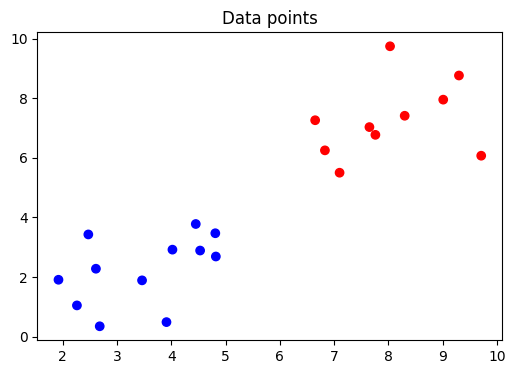

In [5]:
x = np.array([[8.3 , 7.41], [7.1 , 5.5], [9.3 , 8.76], [2.26, 1.05], [4.02, 2.92], [1.92, 1.91], [2.68, 0.35], 
              [4.82, 2.69], [9.71, 6.07], [3.46, 1.89], [4.53, 2.89], [2.61, 2.28], [7.65, 7.03], [2.47, 3.43], 
              [7.76, 6.77], [4.81, 3.47], [6.83, 6.25], [3.91, 0.49], [6.65, 7.26], [9.01, 7.95], [4.45, 3.78], 
              [8.03, 9.74]])

d = np.array([1, 1, 1, -1,  -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1])

plt.figure(figsize=(6,4))
plt.title("Data points")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.show()

**a) (10 pontos)** Crie duas redes neurais (1 Perceptron e 1 Adaline), defina os parâmetros delas como preferir, seguindo o quadro de restrições abaixo.

|Hiperparâmetro|Restrição|
|-|-|
|Taxa de aprendizado|Entre 0.005 e 0.1|
|Tolerância|Entre $10^{-7}$ e $10^{-6}$|
|Máximo de épocas|Entre 1000 e 10000|

Exemplo de criação de rede
```python
rede1 = MODELO_DA_REDE(parâmetros da rede)
rede2 = MODELO_DA_REDE(parâmetros da rede)
```

In [6]:
# REDE NEURAL 1
rede_perceptron = Perceptron(lr=0.005, n_epochs=1000)

# REDE NEURAL 2
rede_adaline = Adaline(lr=0.005, e=10e-7)

**b) (12 pontos)** Treine as duas redes com os dados fornecidos anteriormente (x e d). 

In [7]:
# TREINAMENTO REDE 1
rede_perceptron.train(x=x, d=d)

EPOCH: 0 - Erros da época: -22
EPOCH: 1 - Erros da época: -16
EPOCH: 2 - Erros da época: -12
EPOCH: 3 - Erros da época: -16
EPOCH: 4 - Erros da época: -14
EPOCH: 5 - Erros da época: -14
EPOCH: 6 - Erros da época: -14
EPOCH: 7 - Erros da época: -12
EPOCH: 8 - Erros da época: -12
EPOCH: 9 - Erros da época: -12
EPOCH: 10 - Erros da época: -10
EPOCH: 11 - Erros da época: -10
EPOCH: 12 - Erros da época: -10
EPOCH: 13 - Erros da época: -10
EPOCH: 14 - Erros da época: -10
EPOCH: 15 - Erros da época: -8
EPOCH: 16 - Erros da época: -8
EPOCH: 17 - Erros da época: -8
EPOCH: 18 - Erros da época: -8
EPOCH: 19 - Erros da época: -6
EPOCH: 20 - Erros da época: -8
EPOCH: 21 - Erros da época: -6
EPOCH: 22 - Erros da época: -8
EPOCH: 23 - Erros da época: -10
EPOCH: 24 - Erros da época: -6
EPOCH: 25 - Erros da época: -10
EPOCH: 26 - Erros da época: -8
EPOCH: 27 - Erros da época: -8
EPOCH: 28 - Erros da época: -6
EPOCH: 29 - Erros da época: -8
EPOCH: 30 - Erros da época: -8
EPOCH: 31 - Erros da época: -8
E

In [9]:
# TREINAMENTO REDE 2
rede_adaline.train(x=x, d=d)

EPOCH: 0	- MSE: 4.624650763768624	- MSE_ant - MSE: inf
EPOCH: 1	- MSE: 0.49047838786968945	- MSE_ant - MSE: 4.134172375898935
EPOCH: 2	- MSE: 0.45775159825349515	- MSE_ant - MSE: 0.032726789616194296
EPOCH: 3	- MSE: 0.43053221411822346	- MSE_ant - MSE: 0.027219384135271696
EPOCH: 4	- MSE: 0.40776539561919917	- MSE_ant - MSE: 0.02276681849902429
EPOCH: 5	- MSE: 0.388601256687295	- MSE_ant - MSE: 0.019164138931904162
EPOCH: 6	- MSE: 0.3723554429489368	- MSE_ant - MSE: 0.016245813738358206
EPOCH: 7	- MSE: 0.3584769522399744	- MSE_ant - MSE: 0.01387849070896241
EPOCH: 8	- MSE: 0.34652218853348554	- MSE_ant - MSE: 0.011954763706488847
EPOCH: 9	- MSE: 0.3361340449554672	- MSE_ant - MSE: 0.010388143578018316
EPOCH: 10	- MSE: 0.32702504384954784	- MSE_ant - MSE: 0.00910900110591939
EPOCH: 11	- MSE: 0.3189637493915793	- MSE_ant - MSE: 0.008061294457968549
EPOCH: 12	- MSE: 0.31176381965237904	- MSE_ant - MSE: 0.00719992973920025
EPOCH: 13	- MSE: 0.3052751872224327	- MSE_ant - MSE: 0.006488632429

São fornecidos os seguintes dados de teste:

In [13]:
x_teste = np.array([[3.29, 1.67], [5.28, 5.98], [3.49, 4.9 ], [1.82, 3.51], [7.68, 9.95], [8.05, 6.01], [6.8 , 6.09], 
                    [9.45, 9.78]])

d_teste = np.array([-1, -1, -1, -1, 1, 1, 1, 1])

**c) (12 pontos)** Teste as duas redes enviando x_teste. Apresente o resultado do teste e verifique se o resultado de ambas é igual aos valores de d_teste [-1, -1, -1, -1, 1, 1, 1, 1]

In [19]:
# TESTES DA REDE 1
# lembre-se de mostrar o resultado dos testes
rede_perceptron_teste = rede_perceptron.test(x_teste)

# Exibindo
print(rede_perceptron_teste)


[-1, -1, -1, -1, 1, 1, 1, 1]


In [20]:
# TESTES DA REDE 2
# lembre-se de mostrar o resultado dos testes
rede_adaline_teste = rede_adaline.test(x_teste)

# Exibindo
print(rede_adaline_teste)


[-1, -1, -1, -1, 1, 1, 1, 1]


**d) (20 pontos)** Qual das redes treinou mais rápido? Qual obteve mais resultados iguais aos esperados?


Resposta: Assim como esperado a rede perceptron treinou mais rápido, ela gastou apenas 58 épocas, enquanto a Adaline gastou 329

### 2) São fornecidos os valores de *x* e *d* de entrada. Analise a dispersão dos pontos (gráfico).

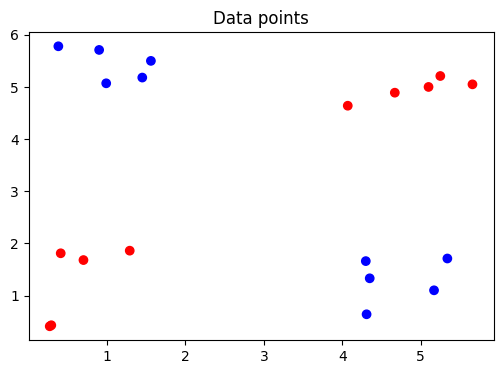

In [21]:
x = np.array([[0.27, 0.41],[0.41, 1.81],[1.29, 1.86],[0.29, 0.43],[0.7 , 1.68],
              [5.66, 5.05],[5.25, 5.21],[4.07, 4.64],[4.67, 4.89],[5.1 , 5.  ],
              [1.45, 5.18],[0.99, 5.07],[0.38, 5.78],[0.9 , 5.71],[1.56, 5.5 ],
              [5.17, 1.1 ],[4.3 , 1.66],[5.34, 1.71],[4.31, 0.64],[4.35, 1.33]])

d = np.array([[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]])

plt.figure(figsize=(6,4))
plt.title("Data points")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.show()

 **a) (10 pontos)** Treine uma rede MLP com:
 * taxa de aprendizado: 0.5
 * tolerância: 1e-7
 * neurônios por camada: camada escondida 1 = 4, camada escondida 2 = 4, camada de saída = 1

In [23]:
# CRIAR REDE 3
# TREINAR A REDE

rede_MLP = MLP(lr = 0.5, e = 1e-7, neurons = [4, 4, 1])
rede_MLP.train(x = x, d = d)

EPOCH: 0 - MSE: [[0.27497722]] - |mse_ant - mse|: [[inf]]
EPOCH: 1 - MSE: [[0.23247255]] - |mse_ant - mse|: [[0.04250468]]
EPOCH: 2 - MSE: [[0.2497827]] - |mse_ant - mse|: [[0.01731015]]
EPOCH: 3 - MSE: [[0.25559246]] - |mse_ant - mse|: [[0.00580975]]
EPOCH: 4 - MSE: [[0.25693911]] - |mse_ant - mse|: [[0.00134665]]
EPOCH: 5 - MSE: [[0.25722058]] - |mse_ant - mse|: [[0.00028148]]
EPOCH: 6 - MSE: [[0.25726258]] - |mse_ant - mse|: [[4.19936151e-05]]
EPOCH: 7 - MSE: [[0.25725176]] - |mse_ant - mse|: [[1.08160707e-05]]
EPOCH: 8 - MSE: [[0.25722958]] - |mse_ant - mse|: [[2.21804301e-05]]
EPOCH: 9 - MSE: [[0.25720514]] - |mse_ant - mse|: [[2.44420635e-05]]
EPOCH: 10 - MSE: [[0.2571804]] - |mse_ant - mse|: [[2.47414252e-05]]
EPOCH: 11 - MSE: [[0.25715575]] - |mse_ant - mse|: [[2.46437948e-05]]
EPOCH: 12 - MSE: [[0.25713126]] - |mse_ant - mse|: [[2.44887435e-05]]
EPOCH: 13 - MSE: [[0.25710692]] - |mse_ant - mse|: [[2.43479498e-05]]
EPOCH: 14 - MSE: [[0.25708268]] - |mse_ant - mse|: [[2.42349804

EPOCH: 133 - MSE: [[0.23707265]] - |mse_ant - mse|: [[0.0009396]]
EPOCH: 134 - MSE: [[0.23608567]] - |mse_ant - mse|: [[0.00098697]]
EPOCH: 135 - MSE: [[0.23505045]] - |mse_ant - mse|: [[0.00103522]]
EPOCH: 136 - MSE: [[0.23396649]] - |mse_ant - mse|: [[0.00108396]]
EPOCH: 137 - MSE: [[0.23283373]] - |mse_ant - mse|: [[0.00113276]]
EPOCH: 138 - MSE: [[0.23165261]] - |mse_ant - mse|: [[0.00118111]]
EPOCH: 139 - MSE: [[0.2304242]] - |mse_ant - mse|: [[0.00122841]]
EPOCH: 140 - MSE: [[0.22915019]] - |mse_ant - mse|: [[0.00127401]]
EPOCH: 141 - MSE: [[0.22783299]] - |mse_ant - mse|: [[0.0013172]]
EPOCH: 142 - MSE: [[0.22647576]] - |mse_ant - mse|: [[0.00135723]]
EPOCH: 143 - MSE: [[0.22508242]] - |mse_ant - mse|: [[0.00139333]]
EPOCH: 144 - MSE: [[0.22365767]] - |mse_ant - mse|: [[0.00142475]]
EPOCH: 145 - MSE: [[0.22220689]] - |mse_ant - mse|: [[0.00145078]]
EPOCH: 146 - MSE: [[0.22073614]] - |mse_ant - mse|: [[0.00147075]]
EPOCH: 147 - MSE: [[0.21925199]] - |mse_ant - mse|: [[0.00148415]

EPOCH: 269 - MSE: [[0.17990453]] - |mse_ant - mse|: [[3.86604107e-05]]
EPOCH: 270 - MSE: [[0.1798664]] - |mse_ant - mse|: [[3.81283413e-05]]
EPOCH: 271 - MSE: [[0.17982879]] - |mse_ant - mse|: [[3.76100522e-05]]
EPOCH: 272 - MSE: [[0.17979168]] - |mse_ant - mse|: [[3.71052533e-05]]
EPOCH: 273 - MSE: [[0.17975507]] - |mse_ant - mse|: [[3.66136669e-05]]
EPOCH: 274 - MSE: [[0.17971893]] - |mse_ant - mse|: [[3.61350265e-05]]
EPOCH: 275 - MSE: [[0.17968327]] - |mse_ant - mse|: [[3.56690776e-05]]
EPOCH: 276 - MSE: [[0.17964805]] - |mse_ant - mse|: [[3.52155771e-05]]
EPOCH: 277 - MSE: [[0.17961328]] - |mse_ant - mse|: [[3.47742933e-05]]
EPOCH: 278 - MSE: [[0.17957893]] - |mse_ant - mse|: [[3.43450059e-05]]
EPOCH: 279 - MSE: [[0.179545]] - |mse_ant - mse|: [[3.39275059e-05]]
EPOCH: 280 - MSE: [[0.17951148]] - |mse_ant - mse|: [[3.35215955e-05]]
EPOCH: 281 - MSE: [[0.17947835]] - |mse_ant - mse|: [[3.31270884e-05]]
EPOCH: 282 - MSE: [[0.17944561]] - |mse_ant - mse|: [[3.27438095e-05]]
EPOCH: 28

EPOCH: 400 - MSE: [[0.16806748]] - |mse_ant - mse|: [[0.00059108]]
EPOCH: 401 - MSE: [[0.16742576]] - |mse_ant - mse|: [[0.00064172]]
EPOCH: 402 - MSE: [[0.16672885]] - |mse_ant - mse|: [[0.00069692]]
EPOCH: 403 - MSE: [[0.16597206]] - |mse_ant - mse|: [[0.00075678]]
EPOCH: 404 - MSE: [[0.16515079]] - |mse_ant - mse|: [[0.00082128]]
EPOCH: 405 - MSE: [[0.16426067]] - |mse_ant - mse|: [[0.00089012]]
EPOCH: 406 - MSE: [[0.16329797]] - |mse_ant - mse|: [[0.0009627]]
EPOCH: 407 - MSE: [[0.16225998]] - |mse_ant - mse|: [[0.00103798]]
EPOCH: 408 - MSE: [[0.16114567]] - |mse_ant - mse|: [[0.00111431]]
EPOCH: 409 - MSE: [[0.15995637]] - |mse_ant - mse|: [[0.0011893]]
EPOCH: 410 - MSE: [[0.15869663]] - |mse_ant - mse|: [[0.00125974]]
EPOCH: 411 - MSE: [[0.15737508]] - |mse_ant - mse|: [[0.00132155]]
EPOCH: 412 - MSE: [[0.15600514]] - |mse_ant - mse|: [[0.00136995]]
EPOCH: 413 - MSE: [[0.15460523]] - |mse_ant - mse|: [[0.00139991]]
EPOCH: 414 - MSE: [[0.15319838]] - |mse_ant - mse|: [[0.00140685

EPOCH: 529 - MSE: [[0.00730718]] - |mse_ant - mse|: [[0.00015417]]
EPOCH: 530 - MSE: [[0.00715871]] - |mse_ant - mse|: [[0.00014847]]
EPOCH: 531 - MSE: [[0.00701565]] - |mse_ant - mse|: [[0.00014306]]
EPOCH: 532 - MSE: [[0.00687772]] - |mse_ant - mse|: [[0.00013793]]
EPOCH: 533 - MSE: [[0.00674466]] - |mse_ant - mse|: [[0.00013306]]
EPOCH: 534 - MSE: [[0.00661622]] - |mse_ant - mse|: [[0.00012844]]
EPOCH: 535 - MSE: [[0.00649218]] - |mse_ant - mse|: [[0.00012404]]
EPOCH: 536 - MSE: [[0.00637232]] - |mse_ant - mse|: [[0.00011986]]
EPOCH: 537 - MSE: [[0.00625644]] - |mse_ant - mse|: [[0.00011588]]
EPOCH: 538 - MSE: [[0.00614435]] - |mse_ant - mse|: [[0.00011208]]
EPOCH: 539 - MSE: [[0.00603589]] - |mse_ant - mse|: [[0.00010847]]
EPOCH: 540 - MSE: [[0.00593088]] - |mse_ant - mse|: [[0.00010501]]
EPOCH: 541 - MSE: [[0.00582916]] - |mse_ant - mse|: [[0.00010172]]
EPOCH: 542 - MSE: [[0.00573059]] - |mse_ant - mse|: [[9.85685829e-05]]
EPOCH: 543 - MSE: [[0.00563503]] - |mse_ant - mse|: [[9.55

EPOCH: 650 - MSE: [[0.00189629]] - |mse_ant - mse|: [[1.26371447e-05]]
EPOCH: 651 - MSE: [[0.00188381]] - |mse_ant - mse|: [[1.2482206e-05]]
EPOCH: 652 - MSE: [[0.00187148]] - |mse_ant - mse|: [[1.23300215e-05]]
EPOCH: 653 - MSE: [[0.0018593]] - |mse_ant - mse|: [[1.21805273e-05]]
EPOCH: 654 - MSE: [[0.00184727]] - |mse_ant - mse|: [[1.20336614e-05]]
EPOCH: 655 - MSE: [[0.00183538]] - |mse_ant - mse|: [[1.18893636e-05]]
EPOCH: 656 - MSE: [[0.00182363]] - |mse_ant - mse|: [[1.17475752e-05]]
EPOCH: 657 - MSE: [[0.00181202]] - |mse_ant - mse|: [[1.16082394e-05]]
EPOCH: 658 - MSE: [[0.00180055]] - |mse_ant - mse|: [[1.14713007e-05]]
EPOCH: 659 - MSE: [[0.00178921]] - |mse_ant - mse|: [[1.13367053e-05]]
EPOCH: 660 - MSE: [[0.00177801]] - |mse_ant - mse|: [[1.1204401e-05]]
EPOCH: 661 - MSE: [[0.00176693]] - |mse_ant - mse|: [[1.10743368e-05]]
EPOCH: 662 - MSE: [[0.00175599]] - |mse_ant - mse|: [[1.09464633e-05]]
EPOCH: 663 - MSE: [[0.00174517]] - |mse_ant - mse|: [[1.08207322e-05]]
EPOCH: 66

EPOCH: 772 - MSE: [[0.0010277]] - |mse_ant - mse|: [[4.01629054e-06]]
EPOCH: 773 - MSE: [[0.00102372]] - |mse_ant - mse|: [[3.9871403e-06]]
EPOCH: 774 - MSE: [[0.00101976]] - |mse_ant - mse|: [[3.95829847e-06]]
EPOCH: 775 - MSE: [[0.00101583]] - |mse_ant - mse|: [[3.92976078e-06]]
EPOCH: 776 - MSE: [[0.00101193]] - |mse_ant - mse|: [[3.90152301e-06]]
EPOCH: 777 - MSE: [[0.00100805]] - |mse_ant - mse|: [[3.87358104e-06]]
EPOCH: 778 - MSE: [[0.00100421]] - |mse_ant - mse|: [[3.84593081e-06]]
EPOCH: 779 - MSE: [[0.00100039]] - |mse_ant - mse|: [[3.81856833e-06]]
EPOCH: 780 - MSE: [[0.0009966]] - |mse_ant - mse|: [[3.79148966e-06]]
EPOCH: 781 - MSE: [[0.00099283]] - |mse_ant - mse|: [[3.76469094e-06]]
EPOCH: 782 - MSE: [[0.00098909]] - |mse_ant - mse|: [[3.73816839e-06]]
EPOCH: 783 - MSE: [[0.00098538]] - |mse_ant - mse|: [[3.71191828e-06]]
EPOCH: 784 - MSE: [[0.0009817]] - |mse_ant - mse|: [[3.68593692e-06]]
EPOCH: 785 - MSE: [[0.00097804]] - |mse_ant - mse|: [[3.66022072e-06]]
EPOCH: 786

EPOCH: 895 - MSE: [[0.00068875]] - |mse_ant - mse|: [[1.89611093e-06]]
EPOCH: 896 - MSE: [[0.00068686]] - |mse_ant - mse|: [[1.88637519e-06]]
EPOCH: 897 - MSE: [[0.00068498]] - |mse_ant - mse|: [[1.87671244e-06]]
EPOCH: 898 - MSE: [[0.00068312]] - |mse_ant - mse|: [[1.86712195e-06]]
EPOCH: 899 - MSE: [[0.00068126]] - |mse_ant - mse|: [[1.85760303e-06]]
EPOCH: 900 - MSE: [[0.00067941]] - |mse_ant - mse|: [[1.84815497e-06]]
EPOCH: 901 - MSE: [[0.00067757]] - |mse_ant - mse|: [[1.83877707e-06]]
EPOCH: 902 - MSE: [[0.00067574]] - |mse_ant - mse|: [[1.82946865e-06]]
EPOCH: 903 - MSE: [[0.00067392]] - |mse_ant - mse|: [[1.82022904e-06]]
EPOCH: 904 - MSE: [[0.00067211]] - |mse_ant - mse|: [[1.81105757e-06]]
EPOCH: 905 - MSE: [[0.00067031]] - |mse_ant - mse|: [[1.80195358e-06]]
EPOCH: 906 - MSE: [[0.00066852]] - |mse_ant - mse|: [[1.79291641e-06]]
EPOCH: 907 - MSE: [[0.00066673]] - |mse_ant - mse|: [[1.78394542e-06]]
EPOCH: 908 - MSE: [[0.00066496]] - |mse_ant - mse|: [[1.77503998e-06]]
EPOCH:

EPOCH: 1021 - MSE: [[0.00050911]] - |mse_ant - mse|: [[1.07478042e-06]]
EPOCH: 1022 - MSE: [[0.00050804]] - |mse_ant - mse|: [[1.07053512e-06]]
EPOCH: 1023 - MSE: [[0.00050697]] - |mse_ant - mse|: [[1.06631432e-06]]
EPOCH: 1024 - MSE: [[0.00050591]] - |mse_ant - mse|: [[1.06211783e-06]]
EPOCH: 1025 - MSE: [[0.00050485]] - |mse_ant - mse|: [[1.05794546e-06]]
EPOCH: 1026 - MSE: [[0.0005038]] - |mse_ant - mse|: [[1.05379704e-06]]
EPOCH: 1027 - MSE: [[0.00050275]] - |mse_ant - mse|: [[1.04967238e-06]]
EPOCH: 1028 - MSE: [[0.0005017]] - |mse_ant - mse|: [[1.04557131e-06]]
EPOCH: 1029 - MSE: [[0.00050066]] - |mse_ant - mse|: [[1.04149364e-06]]
EPOCH: 1030 - MSE: [[0.00049963]] - |mse_ant - mse|: [[1.03743921e-06]]
EPOCH: 1031 - MSE: [[0.00049859]] - |mse_ant - mse|: [[1.03340783e-06]]
EPOCH: 1032 - MSE: [[0.00049756]] - |mse_ant - mse|: [[1.02939934e-06]]
EPOCH: 1033 - MSE: [[0.00049654]] - |mse_ant - mse|: [[1.02541357e-06]]
EPOCH: 1034 - MSE: [[0.00049552]] - |mse_ant - mse|: [[1.02145034e

EPOCH: 1152 - MSE: [[0.00039765]] - |mse_ant - mse|: [[6.75089256e-07]]
EPOCH: 1153 - MSE: [[0.00039698]] - |mse_ant - mse|: [[6.72938449e-07]]
EPOCH: 1154 - MSE: [[0.00039631]] - |mse_ant - mse|: [[6.70797654e-07]]
EPOCH: 1155 - MSE: [[0.00039564]] - |mse_ant - mse|: [[6.6866681e-07]]
EPOCH: 1156 - MSE: [[0.00039497]] - |mse_ant - mse|: [[6.66545857e-07]]
EPOCH: 1157 - MSE: [[0.00039431]] - |mse_ant - mse|: [[6.64434734e-07]]
EPOCH: 1158 - MSE: [[0.00039364]] - |mse_ant - mse|: [[6.62333381e-07]]
EPOCH: 1159 - MSE: [[0.00039298]] - |mse_ant - mse|: [[6.60241739e-07]]
EPOCH: 1160 - MSE: [[0.00039233]] - |mse_ant - mse|: [[6.58159748e-07]]
EPOCH: 1161 - MSE: [[0.00039167]] - |mse_ant - mse|: [[6.56087351e-07]]
EPOCH: 1162 - MSE: [[0.00039102]] - |mse_ant - mse|: [[6.54024488e-07]]
EPOCH: 1163 - MSE: [[0.00039036]] - |mse_ant - mse|: [[6.51971103e-07]]
EPOCH: 1164 - MSE: [[0.00038971]] - |mse_ant - mse|: [[6.49927138e-07]]
EPOCH: 1165 - MSE: [[0.00038907]] - |mse_ant - mse|: [[6.47892536

EPOCH: 1269 - MSE: [[0.00033124]] - |mse_ant - mse|: [[4.78305016e-07]]
EPOCH: 1270 - MSE: [[0.00033076]] - |mse_ant - mse|: [[4.77005568e-07]]
EPOCH: 1271 - MSE: [[0.00033029]] - |mse_ant - mse|: [[4.7571128e-07]]
EPOCH: 1272 - MSE: [[0.00032981]] - |mse_ant - mse|: [[4.74422124e-07]]
EPOCH: 1273 - MSE: [[0.00032934]] - |mse_ant - mse|: [[4.73138075e-07]]
EPOCH: 1274 - MSE: [[0.00032887]] - |mse_ant - mse|: [[4.71859104e-07]]
EPOCH: 1275 - MSE: [[0.0003284]] - |mse_ant - mse|: [[4.70585186e-07]]
EPOCH: 1276 - MSE: [[0.00032793]] - |mse_ant - mse|: [[4.69316294e-07]]
EPOCH: 1277 - MSE: [[0.00032746]] - |mse_ant - mse|: [[4.68052403e-07]]
EPOCH: 1278 - MSE: [[0.00032699]] - |mse_ant - mse|: [[4.66793487e-07]]
EPOCH: 1279 - MSE: [[0.00032653]] - |mse_ant - mse|: [[4.65539519e-07]]
EPOCH: 1280 - MSE: [[0.00032606]] - |mse_ant - mse|: [[4.64290474e-07]]
EPOCH: 1281 - MSE: [[0.0003256]] - |mse_ant - mse|: [[4.63046327e-07]]
EPOCH: 1282 - MSE: [[0.00032514]] - |mse_ant - mse|: [[4.61807053e-

EPOCH: 1399 - MSE: [[0.00027851]] - |mse_ant - mse|: [[3.44657586e-07]]
EPOCH: 1400 - MSE: [[0.00027816]] - |mse_ant - mse|: [[3.43852921e-07]]
EPOCH: 1401 - MSE: [[0.00027782]] - |mse_ant - mse|: [[3.43051002e-07]]
EPOCH: 1402 - MSE: [[0.00027748]] - |mse_ant - mse|: [[3.42251817e-07]]
EPOCH: 1403 - MSE: [[0.00027714]] - |mse_ant - mse|: [[3.41455354e-07]]
EPOCH: 1404 - MSE: [[0.0002768]] - |mse_ant - mse|: [[3.40661601e-07]]
EPOCH: 1405 - MSE: [[0.00027646]] - |mse_ant - mse|: [[3.39870546e-07]]
EPOCH: 1406 - MSE: [[0.00027612]] - |mse_ant - mse|: [[3.39082176e-07]]
EPOCH: 1407 - MSE: [[0.00027578]] - |mse_ant - mse|: [[3.38296479e-07]]
EPOCH: 1408 - MSE: [[0.00027544]] - |mse_ant - mse|: [[3.37513444e-07]]
EPOCH: 1409 - MSE: [[0.0002751]] - |mse_ant - mse|: [[3.36733059e-07]]
EPOCH: 1410 - MSE: [[0.00027477]] - |mse_ant - mse|: [[3.35955312e-07]]
EPOCH: 1411 - MSE: [[0.00027443]] - |mse_ant - mse|: [[3.35180191e-07]]
EPOCH: 1412 - MSE: [[0.0002741]] - |mse_ant - mse|: [[3.34407684e-

EPOCH: 1525 - MSE: [[0.00024071]] - |mse_ant - mse|: [[2.61476227e-07]]
EPOCH: 1526 - MSE: [[0.00024045]] - |mse_ant - mse|: [[2.6093904e-07]]
EPOCH: 1527 - MSE: [[0.00024019]] - |mse_ant - mse|: [[2.60403467e-07]]
EPOCH: 1528 - MSE: [[0.00023993]] - |mse_ant - mse|: [[2.59869502e-07]]
EPOCH: 1529 - MSE: [[0.00023967]] - |mse_ant - mse|: [[2.59337138e-07]]
EPOCH: 1530 - MSE: [[0.00023942]] - |mse_ant - mse|: [[2.58806369e-07]]
EPOCH: 1531 - MSE: [[0.00023916]] - |mse_ant - mse|: [[2.5827719e-07]]
EPOCH: 1532 - MSE: [[0.0002389]] - |mse_ant - mse|: [[2.57749592e-07]]
EPOCH: 1533 - MSE: [[0.00023864]] - |mse_ant - mse|: [[2.57223571e-07]]
EPOCH: 1534 - MSE: [[0.00023839]] - |mse_ant - mse|: [[2.5669912e-07]]
EPOCH: 1535 - MSE: [[0.00023813]] - |mse_ant - mse|: [[2.56176233e-07]]
EPOCH: 1536 - MSE: [[0.00023787]] - |mse_ant - mse|: [[2.55654903e-07]]
EPOCH: 1537 - MSE: [[0.00023762]] - |mse_ant - mse|: [[2.55135126e-07]]
EPOCH: 1538 - MSE: [[0.00023736]] - |mse_ant - mse|: [[2.54616894e-0

EPOCH: 1654 - MSE: [[0.00021098]] - |mse_ant - mse|: [[2.03576051e-07]]
EPOCH: 1655 - MSE: [[0.00021077]] - |mse_ant - mse|: [[2.03203633e-07]]
EPOCH: 1656 - MSE: [[0.00021057]] - |mse_ant - mse|: [[2.02832211e-07]]
EPOCH: 1657 - MSE: [[0.00021037]] - |mse_ant - mse|: [[2.02461784e-07]]
EPOCH: 1658 - MSE: [[0.00021017]] - |mse_ant - mse|: [[2.02092346e-07]]
EPOCH: 1659 - MSE: [[0.00020996]] - |mse_ant - mse|: [[2.01723894e-07]]
EPOCH: 1660 - MSE: [[0.00020976]] - |mse_ant - mse|: [[2.01356426e-07]]
EPOCH: 1661 - MSE: [[0.00020956]] - |mse_ant - mse|: [[2.00989937e-07]]
EPOCH: 1662 - MSE: [[0.00020936]] - |mse_ant - mse|: [[2.00624424e-07]]
EPOCH: 1663 - MSE: [[0.00020916]] - |mse_ant - mse|: [[2.00259884e-07]]
EPOCH: 1664 - MSE: [[0.00020896]] - |mse_ant - mse|: [[1.99896313e-07]]
EPOCH: 1665 - MSE: [[0.00020876]] - |mse_ant - mse|: [[1.99533708e-07]]
EPOCH: 1666 - MSE: [[0.00020856]] - |mse_ant - mse|: [[1.99172066e-07]]
EPOCH: 1667 - MSE: [[0.00020836]] - |mse_ant - mse|: [[1.9881138

EPOCH: 1781 - MSE: [[0.00018784]] - |mse_ant - mse|: [[1.63225683e-07]]
EPOCH: 1782 - MSE: [[0.00018768]] - |mse_ant - mse|: [[1.62956186e-07]]
EPOCH: 1783 - MSE: [[0.00018752]] - |mse_ant - mse|: [[1.62687341e-07]]
EPOCH: 1784 - MSE: [[0.00018735]] - |mse_ant - mse|: [[1.62419144e-07]]
EPOCH: 1785 - MSE: [[0.00018719]] - |mse_ant - mse|: [[1.62151595e-07]]
EPOCH: 1786 - MSE: [[0.00018703]] - |mse_ant - mse|: [[1.61884692e-07]]
EPOCH: 1787 - MSE: [[0.00018687]] - |mse_ant - mse|: [[1.61618431e-07]]
EPOCH: 1788 - MSE: [[0.00018671]] - |mse_ant - mse|: [[1.61352812e-07]]
EPOCH: 1789 - MSE: [[0.00018655]] - |mse_ant - mse|: [[1.61087832e-07]]
EPOCH: 1790 - MSE: [[0.00018639]] - |mse_ant - mse|: [[1.60823489e-07]]
EPOCH: 1791 - MSE: [[0.00018622]] - |mse_ant - mse|: [[1.60559781e-07]]
EPOCH: 1792 - MSE: [[0.00018606]] - |mse_ant - mse|: [[1.60296706e-07]]
EPOCH: 1793 - MSE: [[0.0001859]] - |mse_ant - mse|: [[1.60034262e-07]]
EPOCH: 1794 - MSE: [[0.00018574]] - |mse_ant - mse|: [[1.59772448

EPOCH: 1904 - MSE: [[0.00016964]] - |mse_ant - mse|: [[1.34405323e-07]]
EPOCH: 1905 - MSE: [[0.0001695]] - |mse_ant - mse|: [[1.34202578e-07]]
EPOCH: 1906 - MSE: [[0.00016937]] - |mse_ant - mse|: [[1.34000282e-07]]
EPOCH: 1907 - MSE: [[0.00016923]] - |mse_ant - mse|: [[1.33798433e-07]]
EPOCH: 1908 - MSE: [[0.0001691]] - |mse_ant - mse|: [[1.33597029e-07]]
EPOCH: 1909 - MSE: [[0.00016897]] - |mse_ant - mse|: [[1.33396069e-07]]
EPOCH: 1910 - MSE: [[0.00016883]] - |mse_ant - mse|: [[1.33195551e-07]]
EPOCH: 1911 - MSE: [[0.0001687]] - |mse_ant - mse|: [[1.32995476e-07]]
EPOCH: 1912 - MSE: [[0.00016857]] - |mse_ant - mse|: [[1.3279584e-07]]
EPOCH: 1913 - MSE: [[0.00016844]] - |mse_ant - mse|: [[1.32596644e-07]]
EPOCH: 1914 - MSE: [[0.0001683]] - |mse_ant - mse|: [[1.32397885e-07]]
EPOCH: 1915 - MSE: [[0.00016817]] - |mse_ant - mse|: [[1.32199563e-07]]
EPOCH: 1916 - MSE: [[0.00016804]] - |mse_ant - mse|: [[1.32001676e-07]]
EPOCH: 1917 - MSE: [[0.00016791]] - |mse_ant - mse|: [[1.31804223e-07

EPOCH: 2037 - MSE: [[0.00015341]] - |mse_ant - mse|: [[1.109265e-07]]
EPOCH: 2038 - MSE: [[0.0001533]] - |mse_ant - mse|: [[1.10773488e-07]]
EPOCH: 2039 - MSE: [[0.00015319]] - |mse_ant - mse|: [[1.10620785e-07]]
EPOCH: 2040 - MSE: [[0.00015307]] - |mse_ant - mse|: [[1.10468391e-07]]
EPOCH: 2041 - MSE: [[0.00015296]] - |mse_ant - mse|: [[1.10316305e-07]]
EPOCH: 2042 - MSE: [[0.00015285]] - |mse_ant - mse|: [[1.10164525e-07]]
EPOCH: 2043 - MSE: [[0.00015274]] - |mse_ant - mse|: [[1.10013052e-07]]
EPOCH: 2044 - MSE: [[0.00015263]] - |mse_ant - mse|: [[1.09861884e-07]]
EPOCH: 2045 - MSE: [[0.00015252]] - |mse_ant - mse|: [[1.09711021e-07]]
EPOCH: 2046 - MSE: [[0.00015242]] - |mse_ant - mse|: [[1.09560461e-07]]
EPOCH: 2047 - MSE: [[0.00015231]] - |mse_ant - mse|: [[1.09410204e-07]]
EPOCH: 2048 - MSE: [[0.0001522]] - |mse_ant - mse|: [[1.09260249e-07]]
EPOCH: 2049 - MSE: [[0.00015209]] - |mse_ant - mse|: [[1.09110595e-07]]
EPOCH: 2050 - MSE: [[0.00015198]] - |mse_ant - mse|: [[1.08961242e-0

**b) (16 pontos)** Crie uma nova rede MLP com *taxa de aprendizado* e *tolerância* iguais aos da rede anterior.  
A quantidade de neurônios por camada deve seguir a seguinte regra:  
* Camada escondida 1 -> Maior dígito da sua matrícula (caso o maior dígito seja 1 utilize 2 neurônios)
* Camada escondida 2 -> Menor dígito da sua matrícula (caso o menor dígito seja 0 ou 1 utilize 2 neurônios)
* Camada de saída -> 1 neurônio  
 **Exemplo** : Matrícula **1599**  
Camada escondida 1 -> 9 neurônios  
Camada escondida 2 -> 2 neurônios (menor dígito é 1)  
Camada de saída -> 1 neurônio  

Treine a rede criada

In [24]:
#Livia - 1731

# CRIAR REDE 3
rede_MLP = MLP(lr = 0.5, e = 1e-7, neurons = [7, 2, 1])

# TREINAR A REDE
rede_MLP.train(x = x, d = d)

EPOCH: 0 - MSE: [[0.27297591]] - |mse_ant - mse|: [[inf]]
EPOCH: 1 - MSE: [[0.24376521]] - |mse_ant - mse|: [[0.0292107]]
EPOCH: 2 - MSE: [[0.24886779]] - |mse_ant - mse|: [[0.00510258]]
EPOCH: 3 - MSE: [[0.25400917]] - |mse_ant - mse|: [[0.00514138]]
EPOCH: 4 - MSE: [[0.25630954]] - |mse_ant - mse|: [[0.00230037]]
EPOCH: 5 - MSE: [[0.25720718]] - |mse_ant - mse|: [[0.00089764]]
EPOCH: 6 - MSE: [[0.25754176]] - |mse_ant - mse|: [[0.00033458]]
EPOCH: 7 - MSE: [[0.25766217]] - |mse_ant - mse|: [[0.00012041]]
EPOCH: 8 - MSE: [[0.25770261]] - |mse_ant - mse|: [[4.04423859e-05]]
EPOCH: 9 - MSE: [[0.25771345]] - |mse_ant - mse|: [[1.08400172e-05]]
EPOCH: 10 - MSE: [[0.25771341]] - |mse_ant - mse|: [[4.11429187e-08]]


**c) (20 pontos)** Qual das duas redes MLP foi melhor no treinamento? Justifique citando a quantidade de épocas de treinamento e o erro final (mse)

Resposta: Com relação à época, a segunda rede foi melhor 10 vs 2114. Porém o erro da primeira rede é menor 0.0001453 vs 0.25771341.